In [72]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn
from PIL import Image
import os

## The data

The data is from electron microscopy - images of grpahene sheets. The typical image is $(256, 256)$ but we would like to take small patches of this and identify - is there a defect in the patch.

Lets go through a few of those things. Below we will look at 

* A full image
* A patch of an image with no defects
* A patch with a defect

### Full image

In [74]:
graphene = np.load('full-stack.npy') ## This has 180 different microgrpahs each (256, 256)
sample = np.squeeze(graphene[179])

In [73]:
sample.shape

(48, 48)

In [69]:
sample

In [ ]:
graphene = np.load('full-stack.npy') ## This has 180 different microgrpahs each (256, 256)
pp = np.load('./perfect_patches.npy')
dp = np.load('./defect_patches.npy')
i=0
#os.mkdir("full_stack")
for n in graphene:
    cwd = os.getcwd()
    save_path=cwd+"\\full_stack\\"
    fname = str(i)+".jpeg"
    completeName = os.path.join(save_path, fname)
    sample = np.squeeze(graphene[i])
    im = Image.fromarray(sample*255)
    im = im.convert('RGB')
    im.save(completeName)
    i=i+1
i=0
os.mkdir("pp")
os.mkdir("dp")
for n in pp:
    cwd = os.getcwd()    
    save_path=cwd+"\\pp\\"
    fname = str(i)+".png"
    completeName = os.path.join(save_path, fname)
    sample = np.squeeze(pp[i])
    im = Image.fromarray(sample*255)
    im = im.convert('RGB')
    im.save(completeName)
    i=i+1
i=0
for n in dp:
    cwd = os.getcwd()
    save_path=cwd+"\\dp\\"
    fname = str(i)+".png"
    completeName = os.path.join(save_path, fname)
    sample = np.squeeze(dp[i])
    im = Image.fromarray(sample*255)
    im = im.convert('RGB')
    im.save(completeName)
    i=i+1

E:\New folder\Task3\Task3\pp\


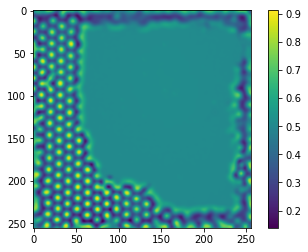

In [5]:
plt.imshow(sample)
plt.colorbar();

#### Description
The blue (high electron density) correspnds to atoms and the green correspnds to background.

You can see that in the middle of the sheet most of it is a pretty regular array of hexagons, this is what we exepct for the perfect lattice. You will also hopefully see some spots where the hexagon is broken. This many of these are the result of missing atom defects. 

Notice the edges look a bit weird too. This is standard, and we will generally ignore the edges when analysing.



### Perfect patch

There is a training dataset of perfect patches 

(2279, 48, 48)


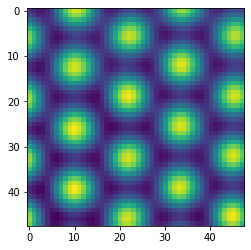

In [35]:
pp = np.load('./perfect_patches.npy')
perfect_sample = pp[2278] 
print(pp.shape)
plt.imshow(perfect_sample);

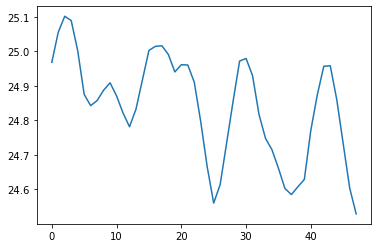

In [29]:
x=np.sum(perfect_sample,axis=1)
plt.plot(x)

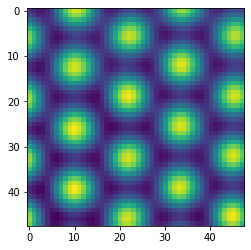

In [45]:
plt.imshow(perfect_sample);

### Defect patch

There is also a set of defective patches. Note - these are for testing only, not for training. I guess we could imagine training a classifier on these and the perfect patches - but that would be no fun :)

In [16]:
dp = np.load('./defect_patches.npy')
defect_sample = dp[23] 
print(dp.shape)

(32, 48, 48)


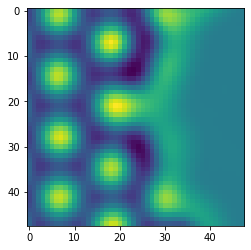

In [17]:
plt.imshow(defect_sample);

array([4, 8, 9])

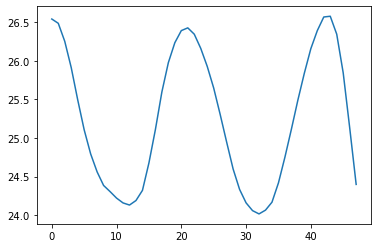

In [24]:
x=np.sum(defect_sample,axis=1)
plt.plot(x)
y=np.sum([[0, 1,3], [0, 5,3], [0, 5,4]], axis=1)
y

Get patches perfect and defect, and put them randomly in a list, with the ground truth saved

In [82]:
patches = np.concatenate([pp, dp])
gt = np.concatenate([np.zeros(len(pp)), np.ones(len(dp))])
xy = list(zip(patches, gt)) # put labels with data in (data, label) tuple
random.shuffle(xy) # shuffle the tuples

In [83]:
patches, gt = list(zip(*xy)) # unzip the tuples to get patches and ground truths as vectors

Have fun :-)

In [217]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.inspection import DecisionBoundaryDisplay
import sklearn.feature_selection

In [215]:
print(sklearn.__version__)

1.0.2


In [ ]:

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]




X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
#print(y.shape)




linearly_separable = (X, y)

datasets = [
    data_testing,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        #DecisionBoundaryDisplay.from_estimator(
        #    clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
       # )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [161]:


datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]
print(len(xy))

print(len(datasets))
#xy[0][1]
xy[0]

# Construct X
X_flattens = []
for row in xy:
    X_flattens.append(row[0])
    
X_flattens = np.array(X_flattens)
X_flattens.shape

data_testing=[X_flattens,gt]
datasets=data_testing
datasets

2311
3


[array([[0.40779695, 0.38810742, 0.3978085 , ..., 0.37205297, 0.40916097,
         0.4810239 ],
        [0.45081285, 0.4860107 , 0.5294979 , ..., 0.4102885 , 0.43048194,
         0.4711275 ],
        [0.4091479 , 0.42476422, 0.42998362, ..., 0.62049544, 0.68901557,
         0.73577386],
        ...,
        [0.39454895, 0.40175372, 0.42596695, ..., 0.42192236, 0.45222443,
         0.5047594 ],
        [0.47244146, 0.47398004, 0.4625397 , ..., 0.60829043, 0.6355706 ,
         0.6343589 ],
        [0.4154491 , 0.4671979 , 0.5406693 , ..., 0.48150596, 0.4133528 ,
         0.3728699 ]], dtype=float32),
 array([0., 0., 0., ..., 1., 1., 1.])]

In [170]:
#flatten the images


patches = np.concatenate([pp, dp])
n_samples = len(patches)
data = patches.reshape((n_samples, -1))
data.shape
gt = np.concatenate([np.zeros(len(pp)), np.ones(len(dp))])
xy = list(zip(data, gt)) # put labels with data in (data, label) tuple
random.shuffle(xy) # shuffle the tuples

len(xy)

# # Create a classifier: a support vector classifier
# clf = svm.SVC(gamma=0.001)

# # Split data into 50% train and 50% test subsets
# X_train, X_test, y_train, y_test = train_test_split(
#     data, digits.target, test_size=0.5, shuffle=False
# )

# # Learn the digits on the train subset
# clf.fit(X_train, y_train)

# # Predict the value of the digit on the test subset
# predicted = clf.predict(X_test)

2311

In [121]:
patches = np.concatenate([pp, dp])
gt = np.concatenate([np.zeros(len(pp)), np.ones(len(dp))])
xy = list(zip(patches, gt)) # put labels with data in (data, label) tuple
random.shuffle(xy) # shuffle the tuples

len(xy)

2311

E:\Users\Anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


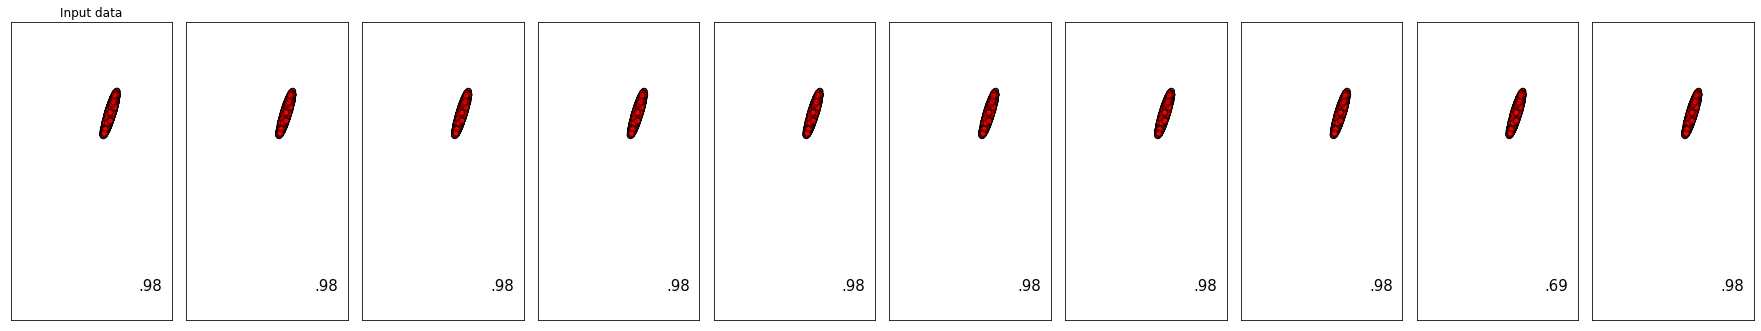

In [202]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
X_train, X_test, y_train, y_test = train_test_split(data, gt, test_size=0.33, random_state=42)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())


    # iterate over classifiers
for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        #DecisionBoundaryDisplay.from_estimator(
        #    clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
       # )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
patches = np.concatenate([pp, dp])
n_samples = len(patches)
data = patches.reshape((n_samples, -1))
data.shape
gt = np.concatenate([np.zeros(len(pp)), np.ones(len(dp))])
xy = list(zip(data, gt)) # put labels with data in (data, label) tuple
random.shuffle(xy) # shuffle the tuples
xy

In [ ]:
patches, gt = list(zip(*xy)) # unzip the tuples to get patches and ground truths as vectors
gt

In [184]:
len(xy)

2311

In [189]:
xy[1][0].shape

(2304,)

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, gt, test_size=0.33, random_state=42)

In [196]:
y_test.count(1.0)

12

In [193]:
print(X_train.shape)

(1548, 2304)


In [230]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import sklearn.metrics as metrics
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
clf.score(X_test,y_test)
print(clf.predict(X_test))
y_test_predict = clf.predict(X_test)
fpr,tpr,threshold = metrics.roc_curve(y_test,y_test_predict)
#fpr_list.appned(fpr)
roc_auc = metrics.auc(fpr,tpr)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
y_test_predict

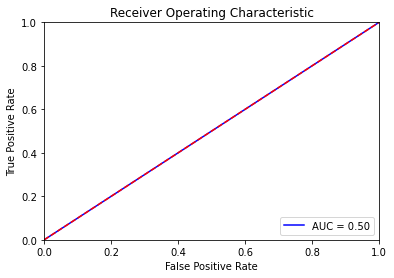

In [221]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()